In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import os
import matplotlib.backends 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path         = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de' 
files        = os.listdir(path)
results      = [os.path.join(path,i) for i in files if i.startswith('lncRNA_0.58_TCGA')]

In [13]:
results

['/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-KIRP_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-HNSC_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-KICH_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-BRCA_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-PRAD_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-ESCA_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-LUAD_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-LUSC_DE',
 '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/lncRNA_0.58_TCGA-STAD_DE',
 '/home/alva/Documents/lncRN

In [3]:
DE_lncRNAs_count = pd.read_csv(path + "/DE_lncRNAs_count", sep="\t", header=0,skipinitialspace=True)
DE_lncRNAs_count['cancer'] = DE_lncRNAs_count['cancer'].apply(lambda x:x.split('-')[1])
DE_lncRNAs_count['cancer'] = DE_lncRNAs_count['cancer'].apply(lambda x:x.split('_')[0])
DE_lncRNAs_count=DE_lncRNAs_count.sort_values(['count']).reset_index(drop=True)

[Text(0.5, 0, 'Number of DE lncRNAs'), Text(0, 0.5, 'TCGA cancer')]

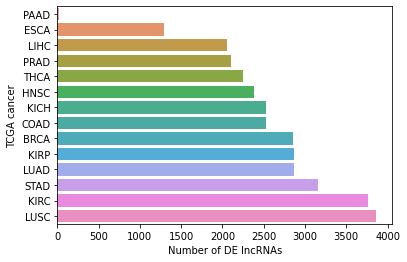

In [4]:
ax = sns.barplot(x="count", y="cancer", data=DE_lncRNAs_count)
ax.set(xlabel= "Number of DE lncRNAs", ylabel='TCGA cancer')

In [5]:
dfs =list()
final_df = pd.DataFrame()
for lncde in results:
    name = os.path.basename(os.path.normpath(lncde))
    df   = pd.read_csv(lncde, sep='\t',header=0,skipinitialspace=True,usecols=["external_gene_name","logFC","P.Value"])
    df.drop_duplicates(inplace=True)
    df['filename'] = name
    df_gene = df[["external_gene_name","filename","logFC","P.Value"]]
    #print("Reading file: {}".format(os.path.basename(os.path.normpath(lncde))))
    dfs.append(df_gene)
    frame=pd.concat(dfs,ignore_index=True,axis=0)
frame['filename']=frame['filename'].apply(lambda x:x.split('_')[2])

In [7]:
df

NameError: name 'df' is not defined

In [17]:
commn_de_drug_tar_distance =pd.read_csv("/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/Drug_targets/BRCA_DE_closetodrugtargets",sep='\t',header=0)
commn_de_drug_tar_distance_100k=commn_de_drug_tar_distance.query('Distance<=10000')

In [22]:
commn_de_drug_tar_distance_100k.query('Gene_sym =="JAK1"')

,chr,start,end,gene_sym_lncNRAs,chr.1,start.1,end.1,Gene_sym,Distance
128,1,64972225,65002489,LINC01359,1,64833229,64966549,JAK1,5677
129,1,64972225,65002489,LINC01359,1,64833229,64966549,JAK1,5677
130,1,64972225,65002489,LINC01359,1,64833229,64966549,JAK1,5677


In [16]:
dfs      = list()
final_df = pd.DataFrame()
for lncde in results:
    name = os.path.basename(os.path.normpath(lncde))
    df   = pd.read_csv(lncde, sep='\t',header=0,skipinitialspace=True,usecols =["AveExpr","external_gene_name"])
    df['filename'] = name
    #df.drop(["gene_id","logFC","chr","start","end","adj_pval","P.Value","AveExpr","gene_sym"], inplace = True,axis=1)
    dfs.append(df)
avexp=pd.concat(dfs)

In [21]:
avexp.rename(columns={'external_gene_name':'gene_sym'},inplace=True)

In [22]:
Triplex_genes_close_totripleDE_lncRNAs = pd.read_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/matrix/Genes_close_totriplex_delncRNAs',sep ='\t',header=0)
Triplex_genes_close_totripleDE_lncRNAs.head()
cis_triplex_DNA_lncRNAs                =Triplex_genes_close_totripleDE_lncRNAs.query('Distance<=100000')
lncRNAs=pd.DataFrame(Triplex_genes_close_totripleDE_lncRNAs['end'])
lncRNAs.reset_index(inplace =True)
lncRNAs.drop('index',inplace =True,axis=1)
lncRNAs.rename(columns={'end':'gene_sym'},inplace=True)

In [5]:
avexp_de_triplex =pd.merge(avexp,lncRNAs, on='gene_sym')
avexp_de_triplex['filename']=avexp_de_triplex['filename'].apply(lambda x:x.split('-')[1])
avexp_de_triplex['filename']=avexp_de_triplex['filename'].apply(lambda x:x.split('_')[0])

NameError: name 'avexp' is not defined

In [48]:
avexp_de_triplex

(2427, 3)

In [35]:
avexp_de_triplex.rename(columns={'filename':'sample','gene_sym':'Gene'},inplace=True)

In [4]:
promoter_meth_lncRNAs=pd.read_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/promoter_methylated_lncRNAs',sep='\t',header=0)
promoter_meth_lncRNAs_avexp=pd.merge(promoter_meth_lncRNAs[["Gene","Corr_Coeff","Meth_Mean","sample"]],avexp_de_triplex,on=['sample','Gene'])
promoter_meth_lncRNAs_avexp.drop_duplicates(inplace=True)

NameError: name 'avexp_de_triplex' is not defined

In [8]:
promoter_meth_lncRNAs.Gene.drop_duplicates().shape

(12,)

In [45]:
sns.barplot(x='sample', y='value', hue='variable', data=promoter_meth_lncRNAs_avexp)
plt.xticks(rotation=90)
plt.title('Methylation vs Expression');

,Gene,Corr_Coeff,Meth_Mean,sample,AveExpr
0,PVT1,-0.506700,0.270403,COAD,3.621140
2,PVT1,-0.743700,0.527601,LIHC,1.349159
4,PVT1,-0.647800,0.282321,LUSC,3.694038
6,PVT1,-0.574800,0.336624,LUAD,3.324109
8,PVT1,-0.615000,0.337770,PRAD,3.434827
10,PVT1,-0.768842,0.589155,KIRP,1.872391
12,PVT1,-0.608100,0.255606,BRCA,3.895351
14,SNHG12,-0.197600,0.047067,COAD,3.833405
15,SNHG12,-0.311300,0.043600,LUAD,3.768668
16,HOTAIR,-0.092920,0.519963,COAD,-3.440762


In [6]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['external_gene_name'],
                                            how='outer'), dfs)

In [7]:
df_merged.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/common_de_lncRNAs', sep='\t',index=True)

In [46]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['external_gene_name'],
                                            how='outer'), dfs).fillna('void')

KeyboardInterrupt: 

In [20]:
triplex = pd.read_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/tripleFPP_triplex_genecode',sep='\t',header=0,skipinitialspace=True)
triplex.rename(columns={'gene_sym_y':'external_gene_name'},inplace =True)
triplex_common_de= pd.merge(df_merged, triplex["external_gene_name"],on='external_gene_name')
triplex_common_de.to_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/common_de_lncRNAs_triplex', sep='\t',index=False)

In [19]:
grouped_multiple

,external_gene_name,filename,logFC,count
0,A1BG-AS1,TCGA-COAD,-1.277354,9
1,A1BG-AS1,TCGA-HNSC,0.988639,9
2,A1BG-AS1,TCGA-KICH,-1.049325,9
3,A1BG-AS1,TCGA-LIHC,-0.772376,9
4,A1BG-AS1,TCGA-LUAD,-0.581519,9
...,...,...,...,...
34494,ZSCAN16-AS1,TCGA-KIRC,-0.778585,5
34495,ZSCAN16-AS1,TCGA-LUAD,-0.642760,5
34496,ZSCAN16-AS1,TCGA-STAD,-1.000631,5
34497,ZSWIM8-AS1,TCGA-KIRC,1.300204,2


In [6]:
de_lncRNA_accross_cancers      =frame.groupby(['external_gene_name']).size()
de_lncRNA_accross_cancers_count=de_lncRNA_accross_cancers.to_frame(name = 'size').reset_index()

In [7]:
# grouped_multiple.groupby([ 'external_gene_name' ]).agg({'count':'sum','filename':'count'})
grouped_multiple = frame.groupby(['external_gene_name','filename','logFC','P.Value']).agg({'external_gene_name':'count'})
grouped_multiple.rename(columns={'external_gene_name':'count'},inplace =True)
grouped_multiple.reset_index(inplace =True)
grouped_multiple['count']= grouped_multiple.groupby(['external_gene_name'])['filename'].transform('count')
#lncRNAs_accross_cancer   = grouped_multiple.query('count >=5')

In [11]:
lncRNAs_accross_cancer   = grouped_multiple.query('count >=5')

lncRNAs_accross_cancer

,external_gene_name,filename,logFC,P.Value,count
0,A1BG-AS1,TCGA-COAD,-1.277354,4.240154e-15,9
1,A1BG-AS1,TCGA-HNSC,0.988639,9.614590e-06,9
2,A1BG-AS1,TCGA-KICH,-1.049325,1.151220e-03,9
3,A1BG-AS1,TCGA-LIHC,-0.772376,1.367678e-05,9
4,A1BG-AS1,TCGA-LUAD,-0.581519,1.148093e-04,9
...,...,...,...,...,...
34492,ZSCAN16-AS1,TCGA-COAD,-0.670712,4.475392e-09,5
34493,ZSCAN16-AS1,TCGA-KICH,-0.968157,1.811925e-08,5
34494,ZSCAN16-AS1,TCGA-KIRC,-0.778585,6.286885e-24,5
34495,ZSCAN16-AS1,TCGA-LUAD,-0.642760,1.651140e-08,5


In [10]:
lncRNAs_accross_cancer.to_csv(path +'/filtered_results/lncRNAs_acrossatleast5cancer', sep='\t',index=False)